In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings(action='ignore')

import matplotlib
matplotlib.rc('font', family='AppleGothic')
matplotlib.rc('axes', unicode_minus=False)

from IPython.display import set_matplotlib_formats
set_matplotlib_formats('retina')

# 그래프 틀 변경
plt.rcParams['axes.unicode_minus'] = False
sns.set(font_scale = 1)  
plt.style.use(['fivethirtyeight'])
pd.set_option('display.max_columns', None)

# 한글폰트 사용
import os

if os.name == 'posix':

    plt.rc("font", family="AppleGothic")
else :

    plt.rc("font", family="Malgun Gothic")


## 최종 데이터 EDA

In [ ]:
data = pd.read_csv('Data/final_ta_0801.csv')

# 온라인 구매 데이터 사용 
data = data
df = data.copy()
df.head()

,고객번호,온오프_구분,제휴사_구분,구매일자,구매시간,구매금액_X,성별,연령,거주지_대분류,년,월,일,구매타입,LPAY_결제횟수,LPAY_결제액수,P_등급,L_등급,최근구매일_R,상품중분류_정규화,주중주말,요일별_인당_평균결제금액,P_결제금액,P_결제횟수,P_결제액수평균
0,M888167499,1,A03,21/09/17,17,6990,0,40,Z17,2021,9,17,유통사,NaN,NaN,2,0,364 days,0.032367,4,5560.063830,3187412,281,11343.1032
1,M888167499,1,A02,21/12/18,16,2290,0,40,Z17,2021,12,18,유통사,NaN,NaN,2,0,364 days,0.057500,5,28952.323529,3187412,281,11343.1032
2,M888167499,1,A03,21/02/07,16,3490,0,40,Z17,2021,2,7,유통사,NaN,NaN,2,0,364 days,0.057500,6,7979.416667,3187412,281,11343.1032
3,M888167499,1,A03,21/02/26,19,2490,0,40,Z17,2021,2,26,유통사,NaN,NaN,2,0,364 days,0.057500,4,5560.063830,3187412,281,11343.1032
4,M888167499,1,A03,21/04/23,19,1000,0,40,Z17,2021,4,23,유통사,NaN,NaN,2,0,364 days,0.057500,4,5560.063830,3187412,281,11343.1032


In [ ]:
df.drop(['온오프_구분','최근구매일_R'], axis = 1, inplace =True)

In [ ]:
# 제휴사처리 
df = df[df.P_등급 != 0]  

In [ ]:
# 데이터가 임포트되며 처리 요망 , 날짜 전처리 

from datetime import datetime

df['구매일자'] = df['구매일자'].str.replace('/',' ')
df['구매일자'] = df['구매일자'].str.replace(' ','')
df['구매일자'] = str(20)+df['구매일자']

df['구매일자']= df['구매일자'].astype(str)
df['구매일자']=  pd.to_datetime(df['구매일자'],  format='%Y-%m-%d') 

In [ ]:
# 최근 구매일 오류수정  
l = pd.DataFrame(df.groupby('고객번호')['구매일자'].max().reset_index())

current_day = pd.to_datetime('20210101') 
time_diff = l['구매일자'] - current_day
l['최근구매일_R'] = time_diff

l.drop('구매일자' , axis = 1, inplace = True)
df = df.merge(l, on = '고객번호' )

In [ ]:
# 결측치 확인 

def check_missing_col(dataframe):
    missing_col = []
    for col in dataframe.columns:
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            print(f'결측치가 있는 컬럼은: {col} 입니다')
            print(f'해당 컬럼에 총 {missing_values} 개의 결측치가 존재합니다.')
            missing_col.append([col, dataframe[col].dtype])
    if missing_col == []:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(df)

결측치가 있는 컬럼은: LPAY_결제횟수 입니다
해당 컬럼에 총 2461130 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: LPAY_결제액수 입니다
해당 컬럼에 총 2461130 개의 결측치가 존재합니다.
결측치가 있는 컬럼은: 상품중분류_정규화 입니다
해당 컬럼에 총 232775 개의 결측치가 존재합니다.


In [ ]:
# 결측치 평균값으로 대체
m = df['상품중분류_정규화'].mean()
df['상품중분류_정규화'].fillna(m, inplace = True)

In [ ]:
# 엘페이 사용유저 

lpay_df = df[(df.L_등급==1)|(df.L_등급==2)|(df.L_등급==3)|(df.L_등급==4)|(df.L_등급==5)]
lpay_df.head(1)

,고객번호,제휴사_구분,구매일자,구매시간,구매금액_X,성별,연령,거주지_대분류,년,월,일,구매타입,LPAY_결제횟수,LPAY_결제액수,P_등급,L_등급,상품중분류_정규화,주중주말,요일별_인당_평균결제금액,P_결제금액,P_결제횟수,P_결제액수평균
60,M536644170,A02,2021-09-11,17,2480,1,40,Z10,2021,9,11,유통사,133.0,8958496.0,1,1,0.021251,5,7067.325905,7286322,580,12562.6241


In [ ]:
display(lpay_df.info(), lpay_df.shape)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378650 entries, 84 to 459573
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype          
---  ------         --------------   -----          
 0   고객번호           378650 non-null  object         
 1   제휴사_구분         378650 non-null  object         
 2   구매일자           378650 non-null  datetime64[ns] 
 3   구매시간           378650 non-null  int64          
 4   구매금액_X         378650 non-null  int64          
 5   성별             378650 non-null  int64          
 6   연령             378650 non-null  int64          
 7   거주지_대분류        378650 non-null  object         
 8   년              378650 non-null  int64          
 9   월              378650 non-null  int64          
 10  일              378650 non-null  int64          
 11  구매타입           378650 non-null  object         
 12  LPAY_결제횟수      378650 non-null  float64        
 13  LPAY_결제액수      378650 non-null  float64        
 14  P_등급           378650 non-null  int

None

(378650, 23)

In [ ]:
lpay_df.select_dtypes(include=['int64','float64']).columns

Index(['구매시간', '구매금액_X', '성별', '연령', '년', '월', '일', 'LPAY_결제횟수', 'LPAY_결제액수',
       'P_등급', 'L_등급', '상품중분류_정규화', '주중주말', '요일별_인당_평균결제금액', 'P_결제금액',
       'P_결제횟수', 'P_결제액수평균'],
      dtype='object')

In [ ]:
lpay_df.select_dtypes(include=['object']).columns

Index(['고객번호', '제휴사_구분', '거주지_대분류', '구매타입'], dtype='object')

<AxesSubplot:>

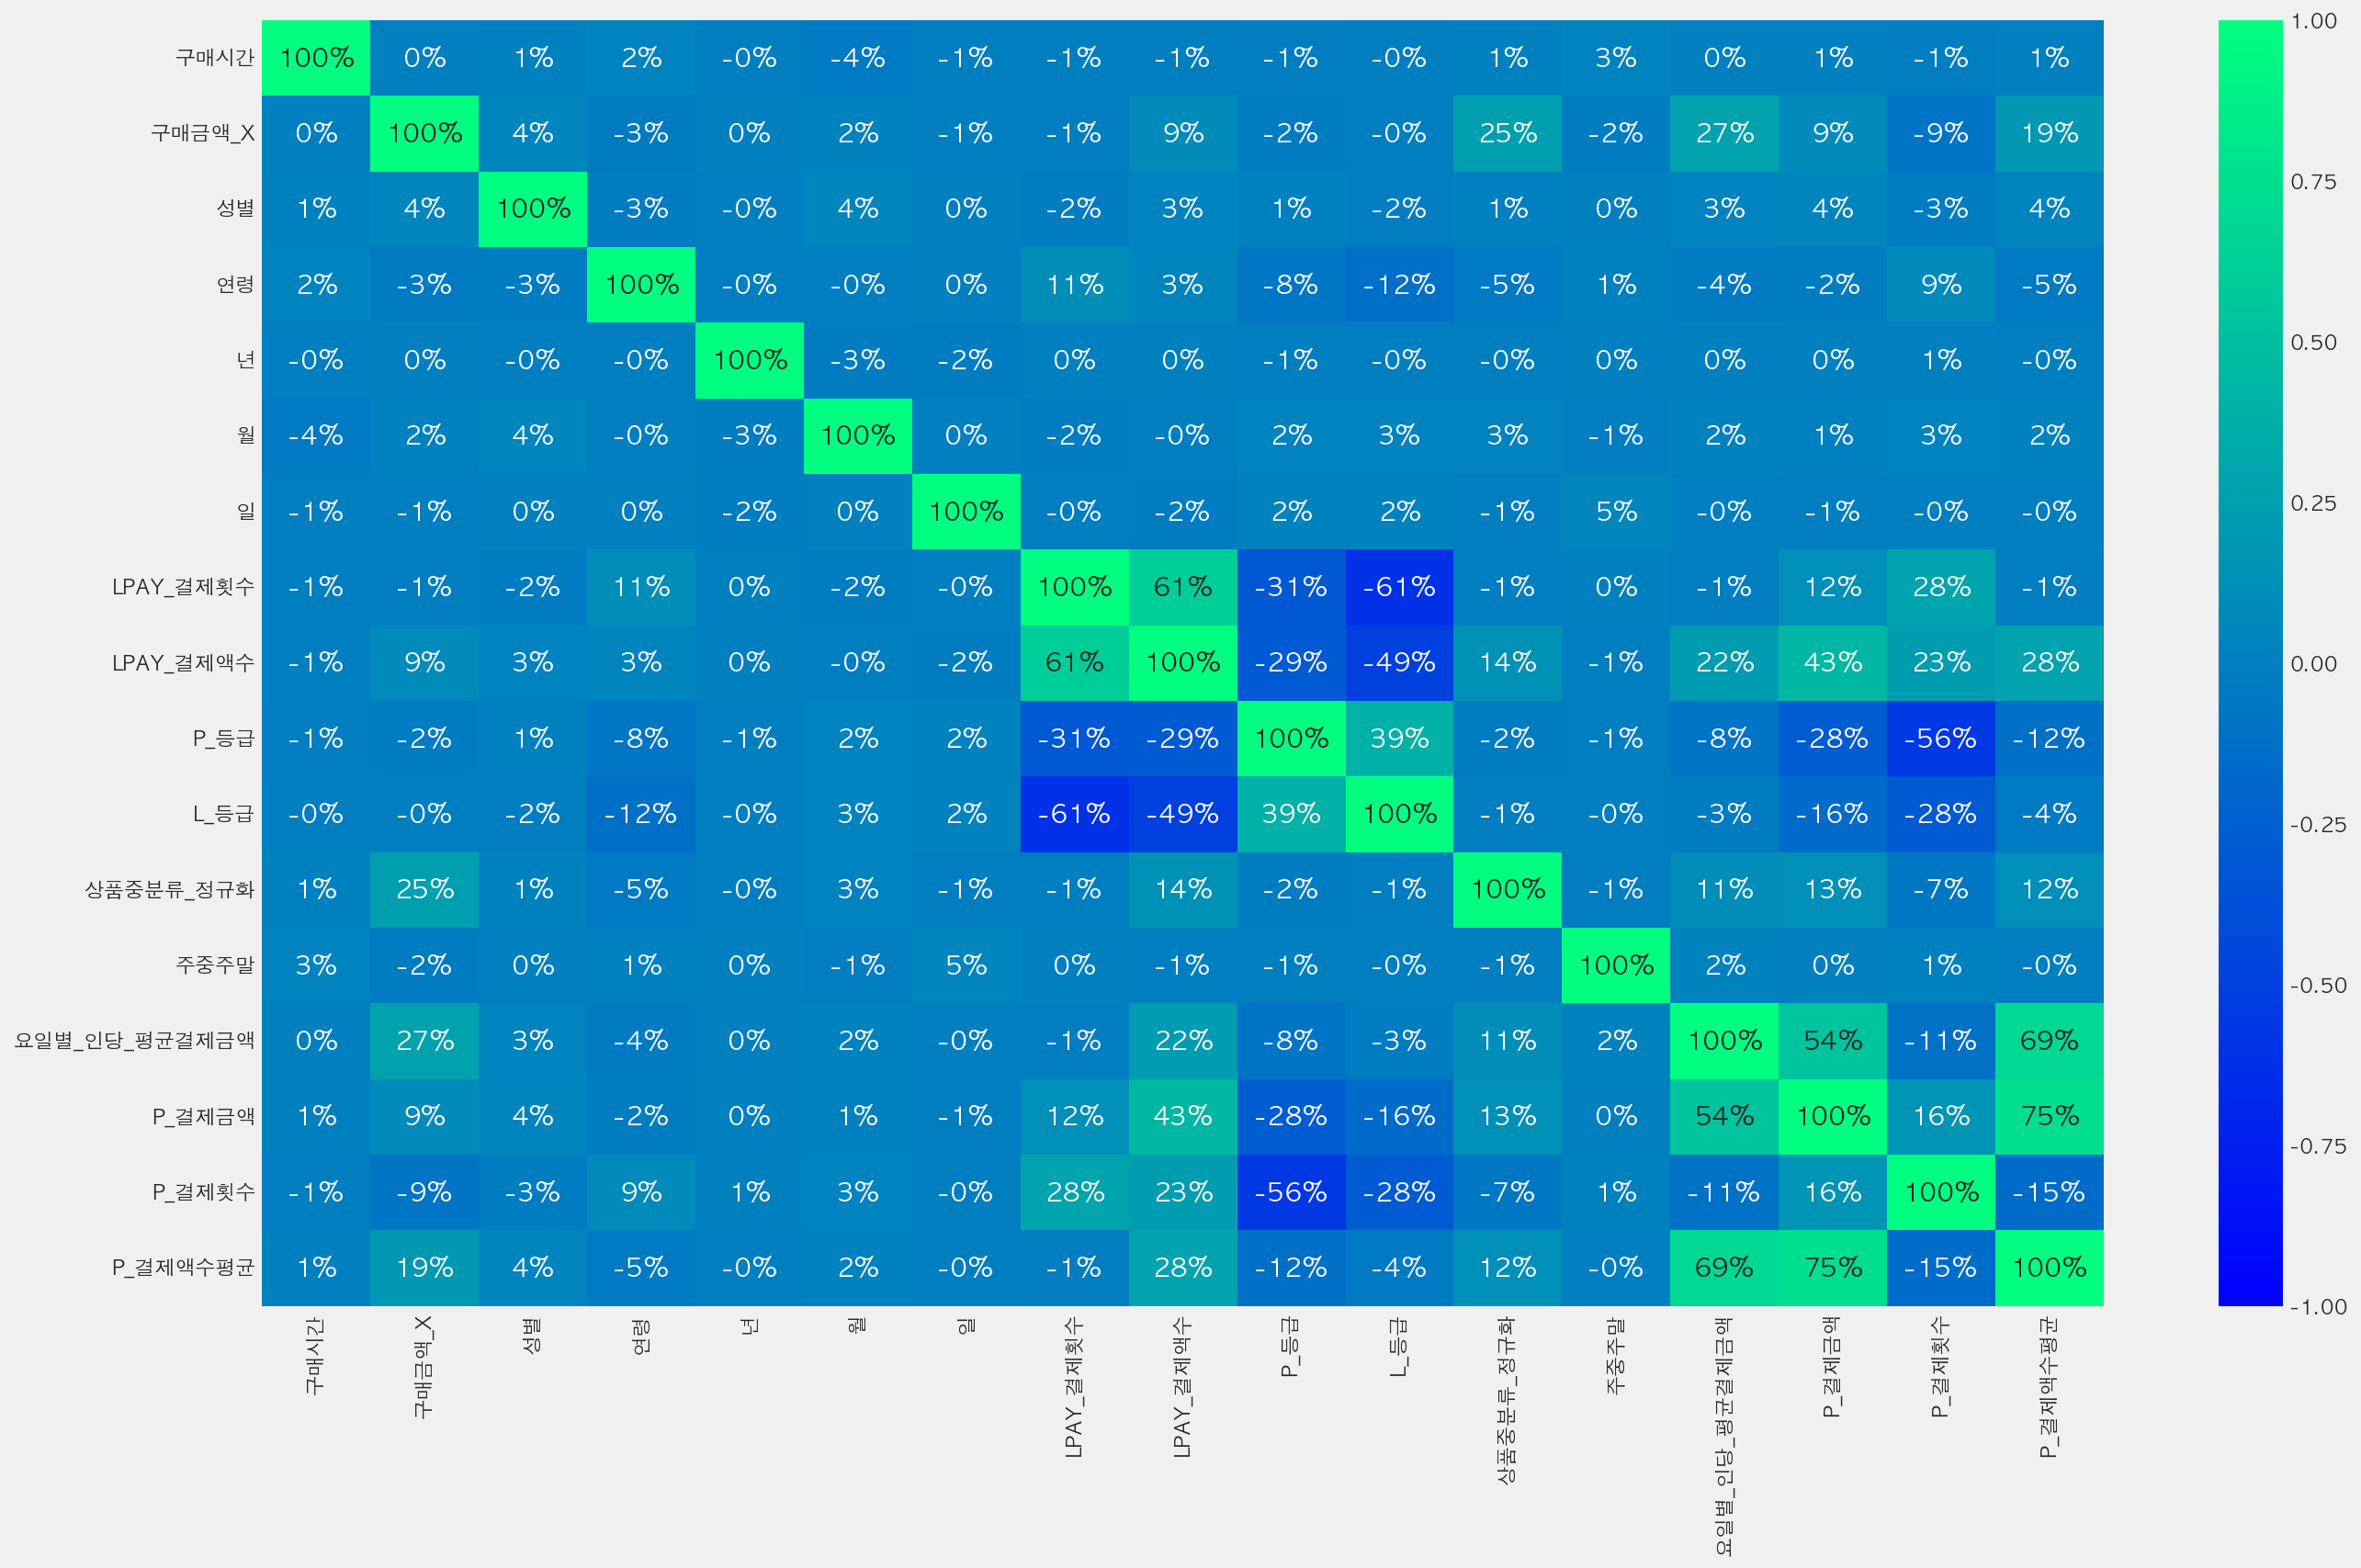

In [ ]:
# 상관성 측적 
corr= lpay_df.corr(method='pearson')
plt.rcParams["figure.figsize"] = (20,12)
sns.heatmap(corr,
           annot = True, fmt = '.0%',cmap = 'winter',
           vmin = -1, vmax=1 )

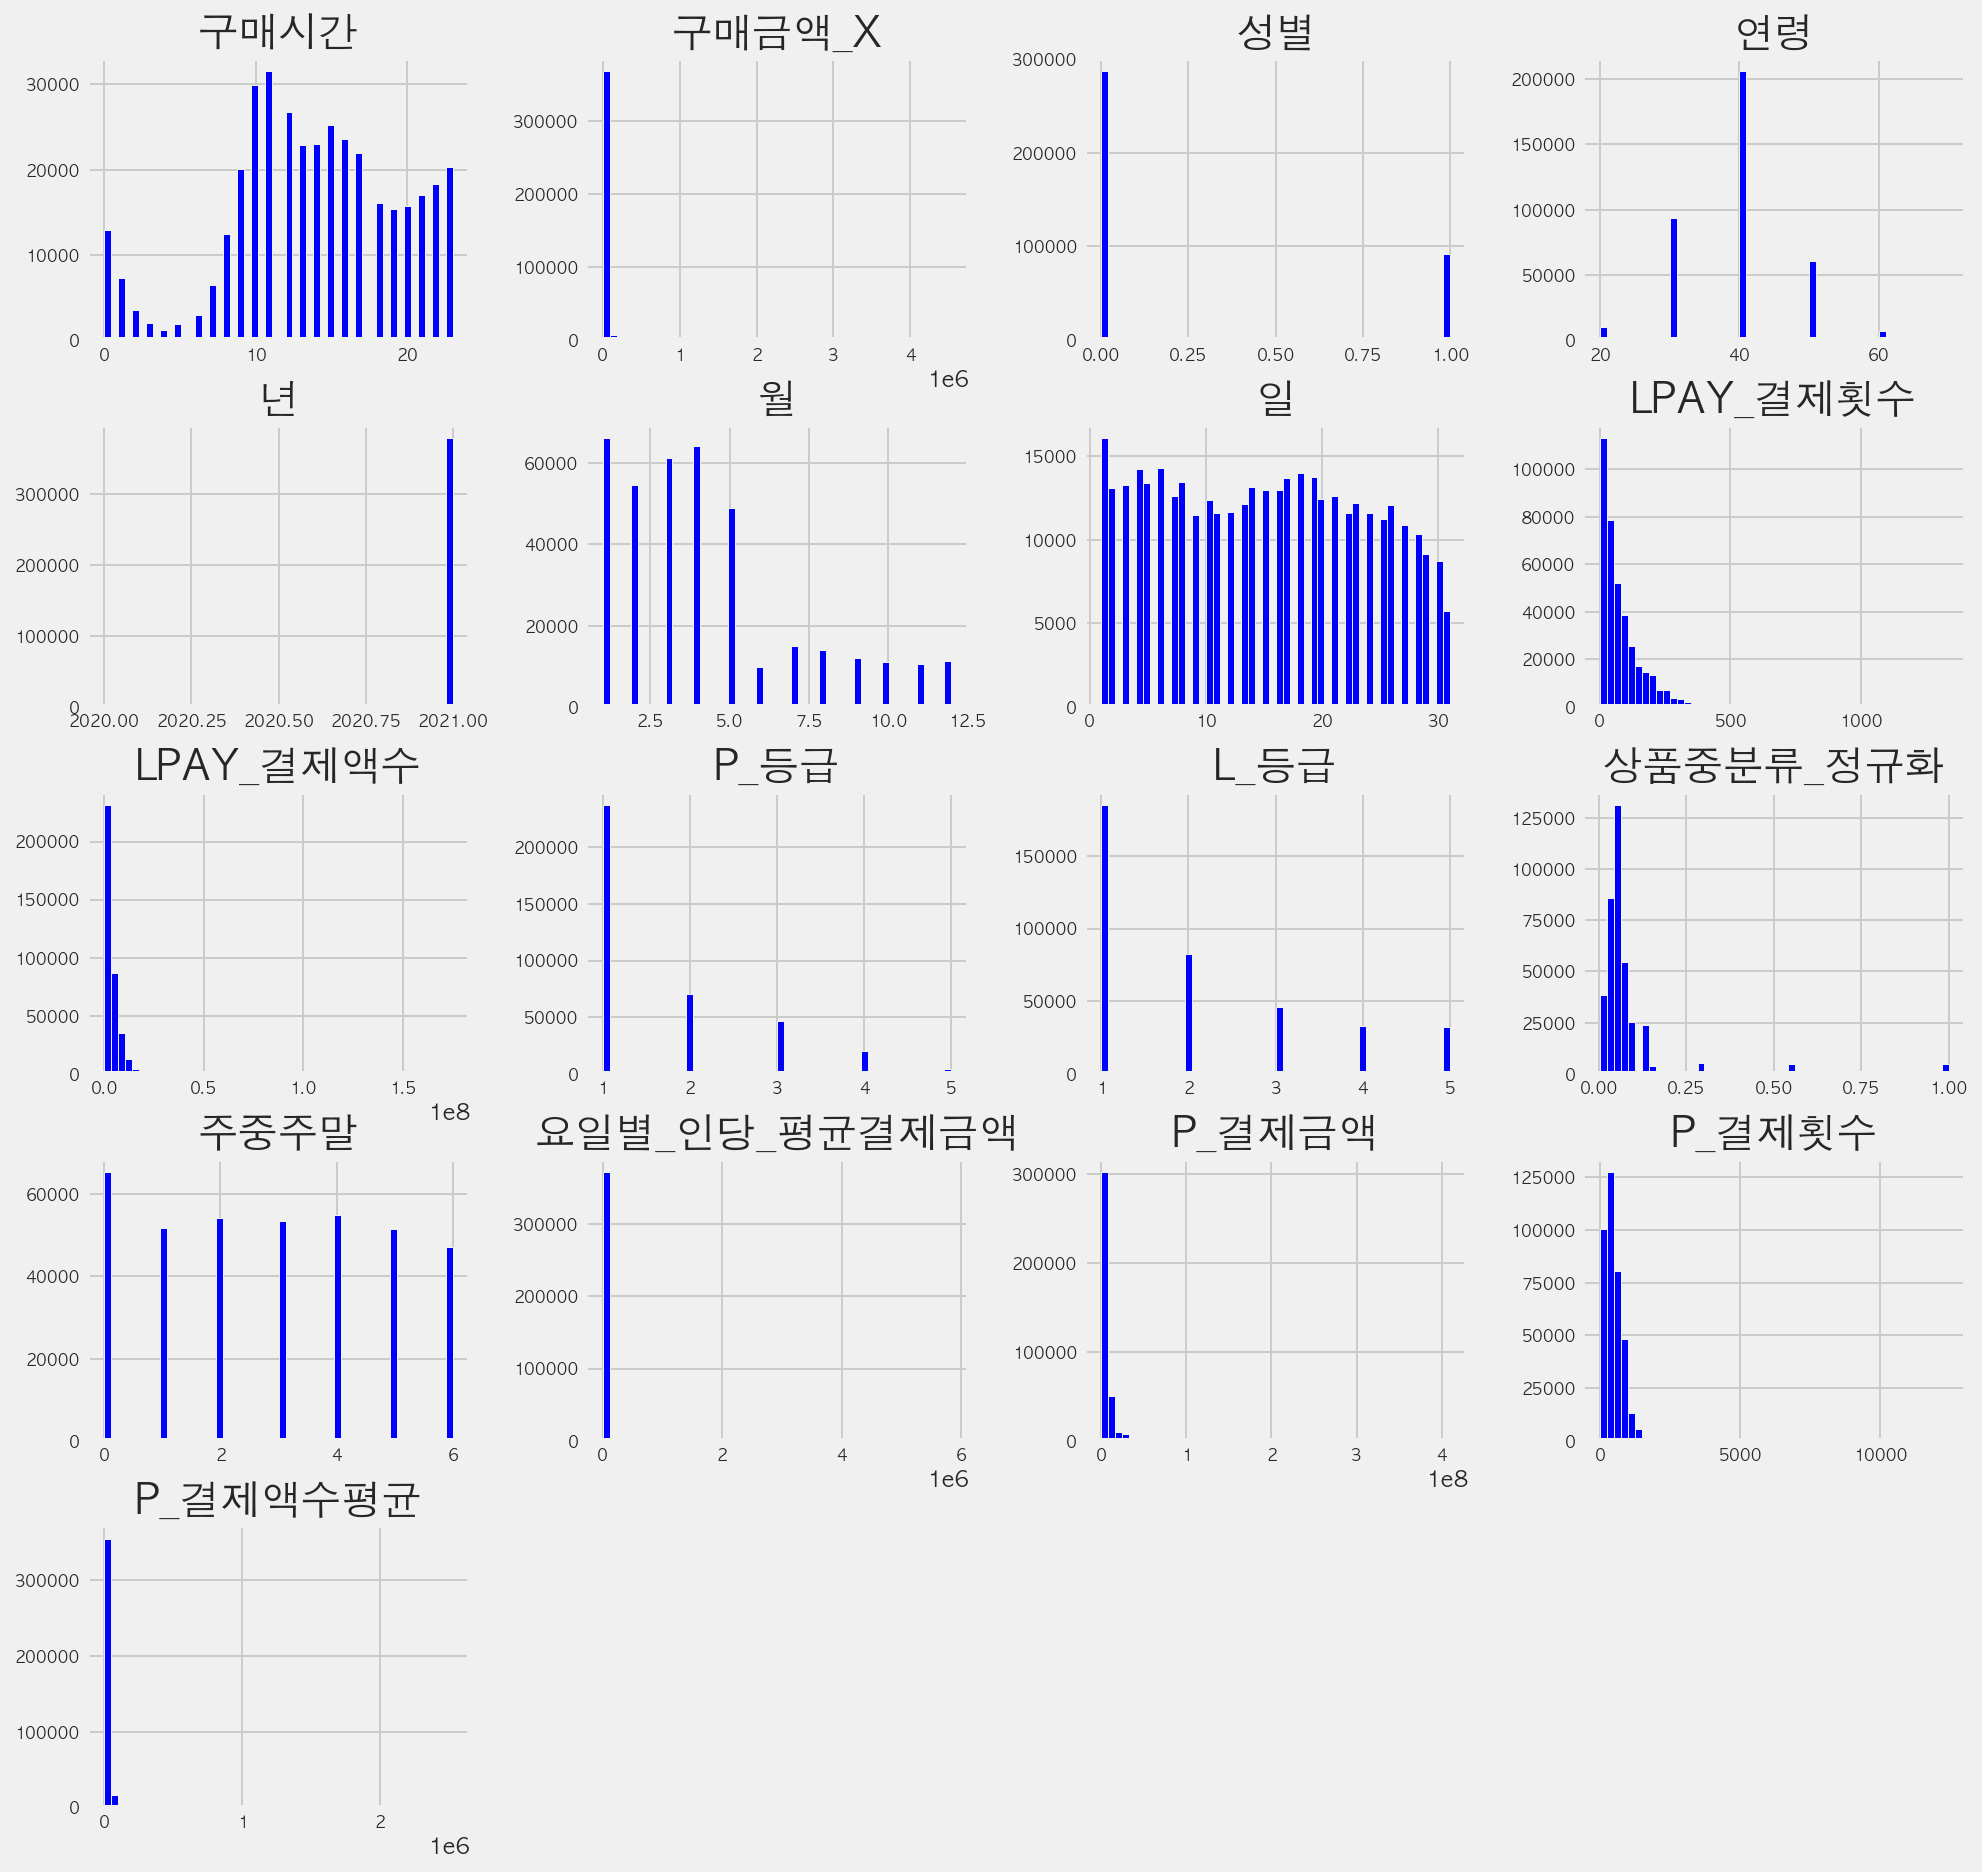

In [ ]:
# 수치 데이터 분포 확인 

lpay_df.iloc[:,:-1].select_dtypes(include=['float64','int64']).hist(figsize=(15, 15),color='blue', bins=50, xlabelsize=8, ylabelsize=8)
plt.show()

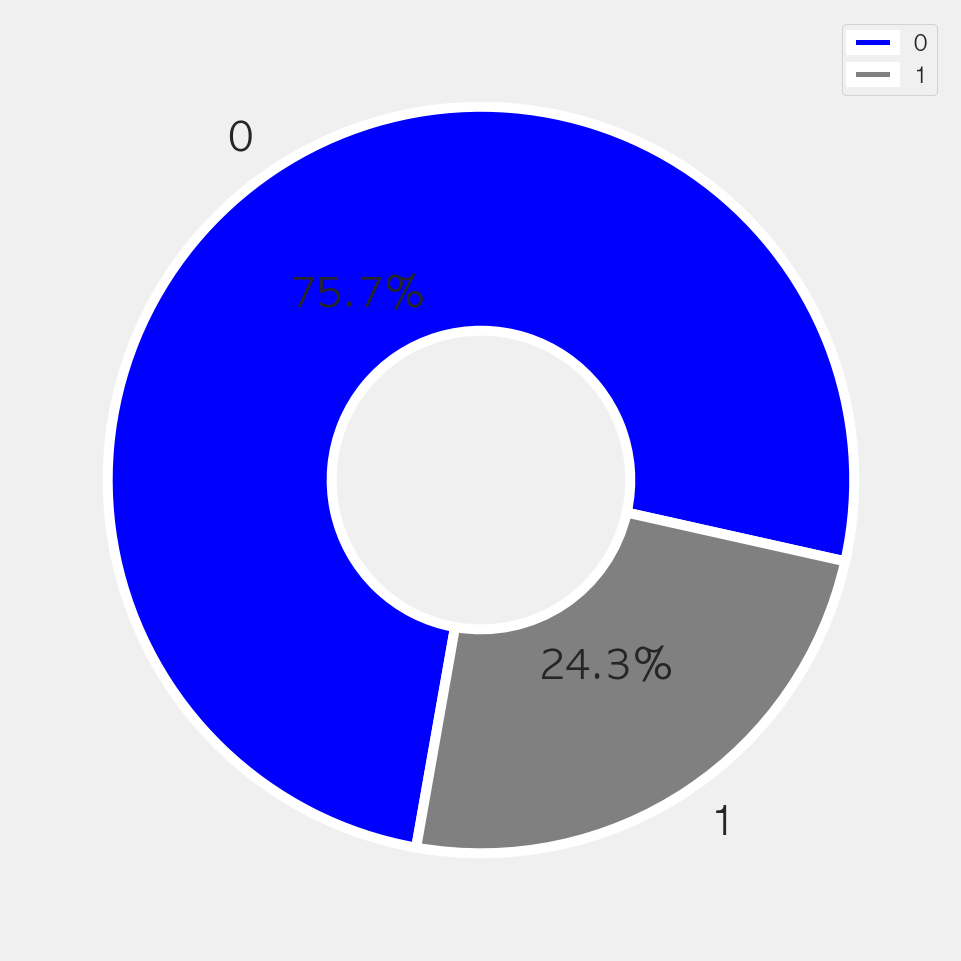

In [ ]:
# 성별 분포

X = lpay_df['성별'].value_counts()

fig , ax  = plt.subplots(figsize = (10,8))
wedgeprops={'width': 0.6, 'edgecolor': 'w', 'linewidth': 5}
colors = ["blue","gray"]

ax.pie(x = X.values, labels = X.index, autopct='%.1f%%'
      ,  startangle=260, counterclock=False,  wedgeprops=wedgeprops, textprops ={'size' :20}, colors = colors
      )

# autopct는 부채꼴 안에 표시될 숫자의 형식을 지정합니다. 소수점 한자리까지 표시하도록 설정했습니다.
# startangle는 부채꼴이 그려지는 시작 각도를 설정합니다.
# counterclock=False로 설정하면 시계 방향 순서로 부채꼴 영역이 표시됩니다
plt.legend()
plt.show()

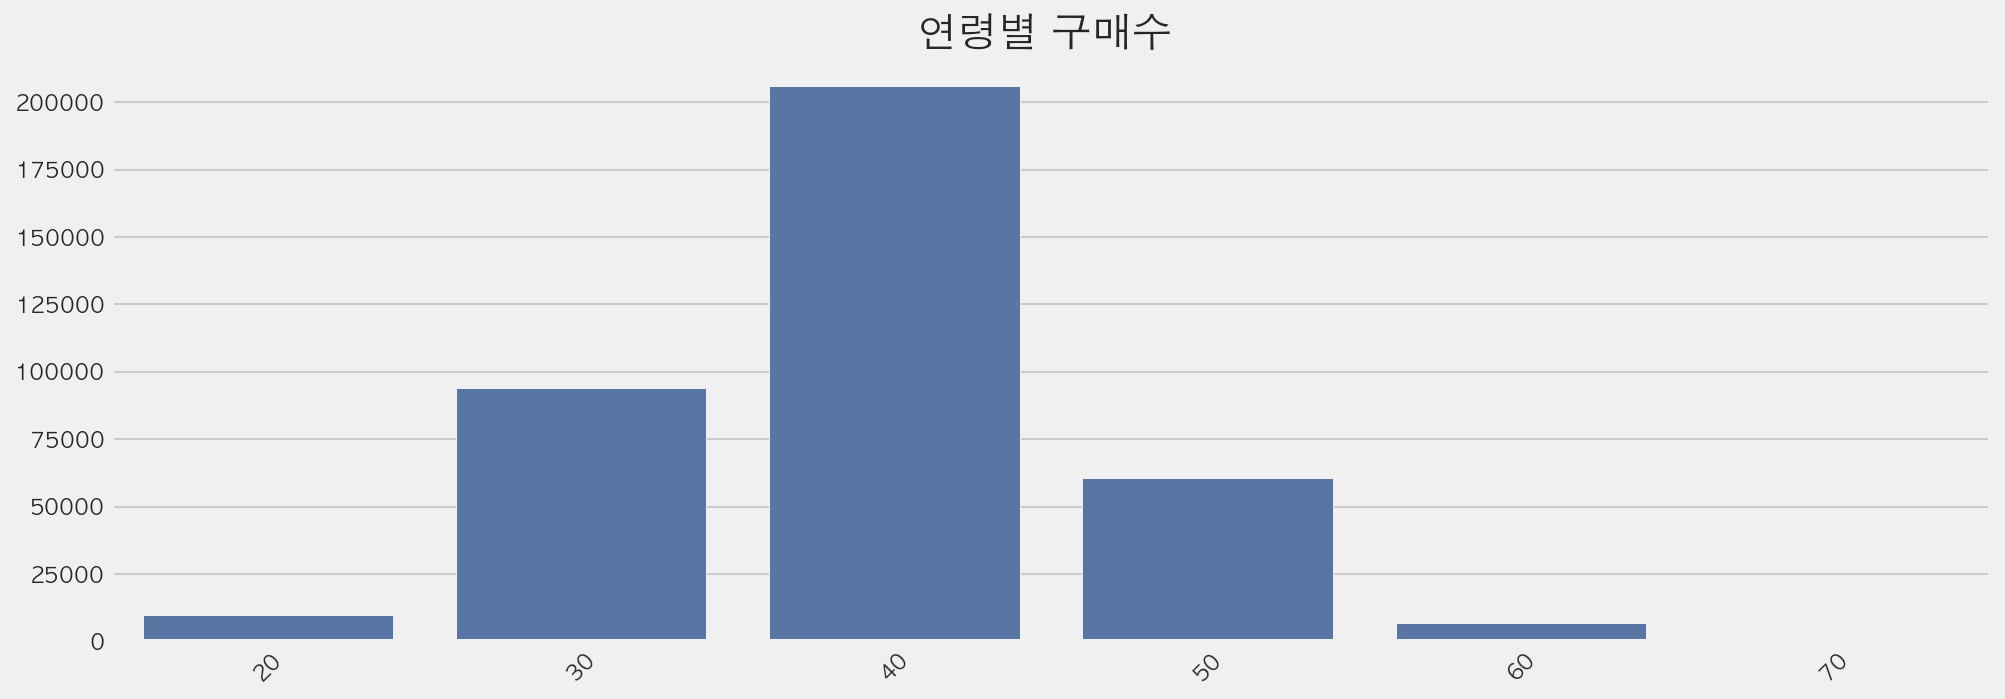

In [ ]:
# 연령별 구매수 

X = lpay_df["연령"].value_counts()
fig ,ax  = plt.subplots(figsize = (15,5))
sns.barplot( X.index, X.values , ax = ax,color = "b")
plt.xticks(rotation = 45)
ax.set_title("연령별 구매수 ")


plt.show()

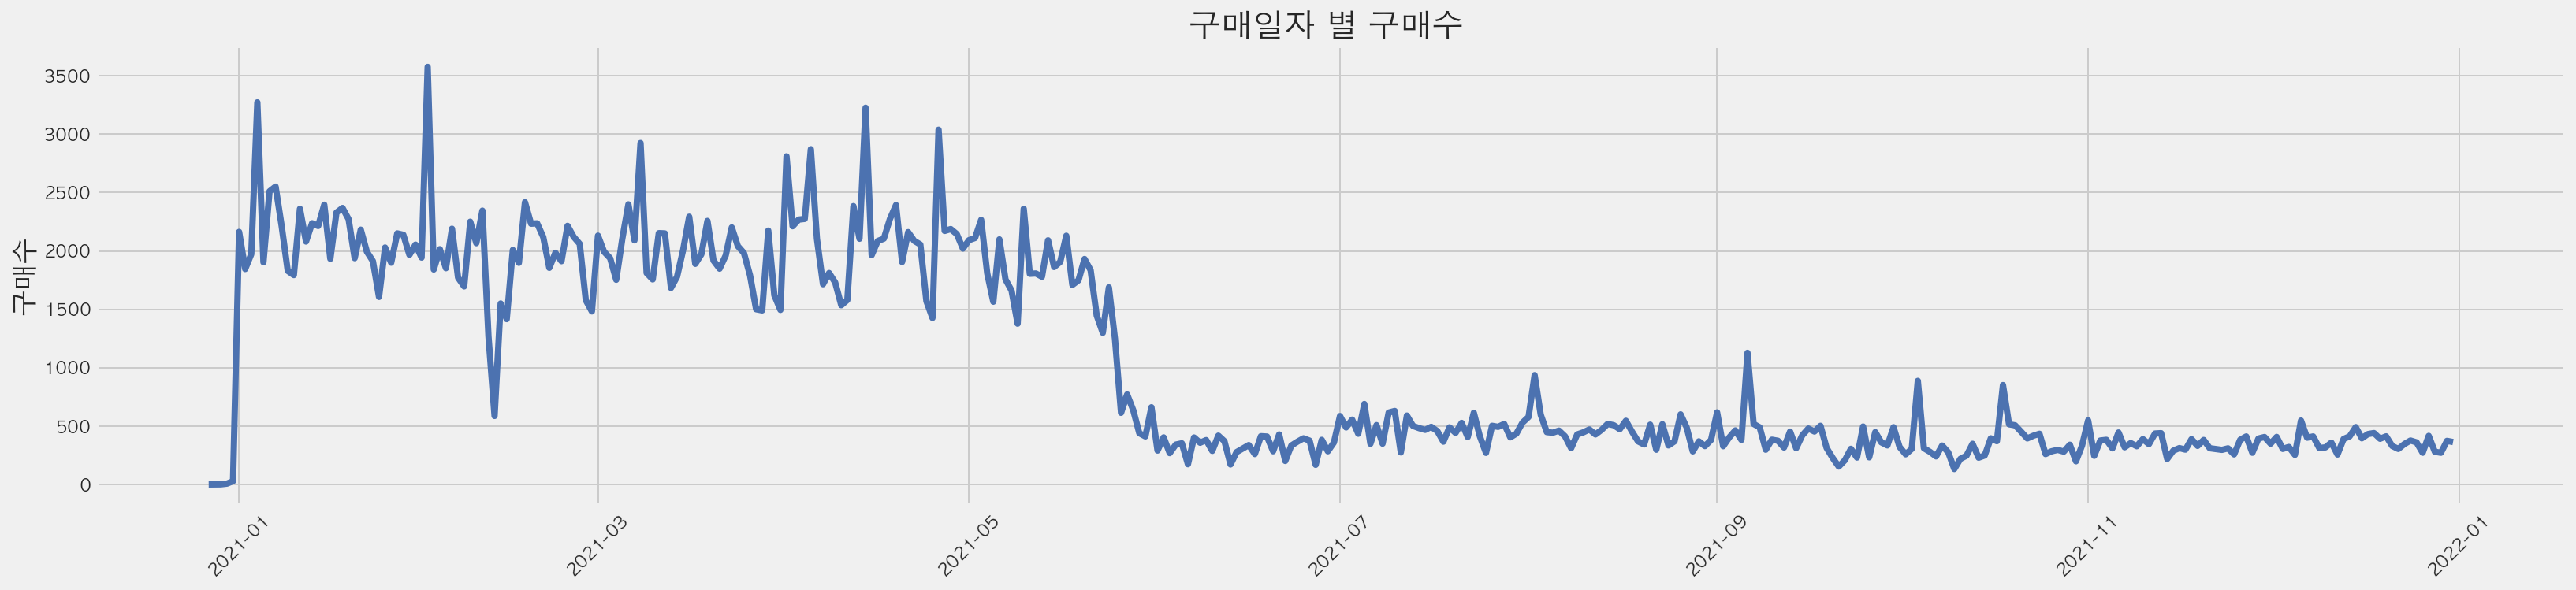

In [ ]:
# 구매일자 별 구매수

X = lpay_df["구매일자"].value_counts()
fig ,ax  = plt.subplots(figsize = (25,5))
sns.lineplot( X.index, X.values , ax = ax,color = "b")
plt.xticks(rotation = 45)
ax.set_title("구매일자 별 구매수 ")
ax.set_ylabel("구매수")

plt.show()

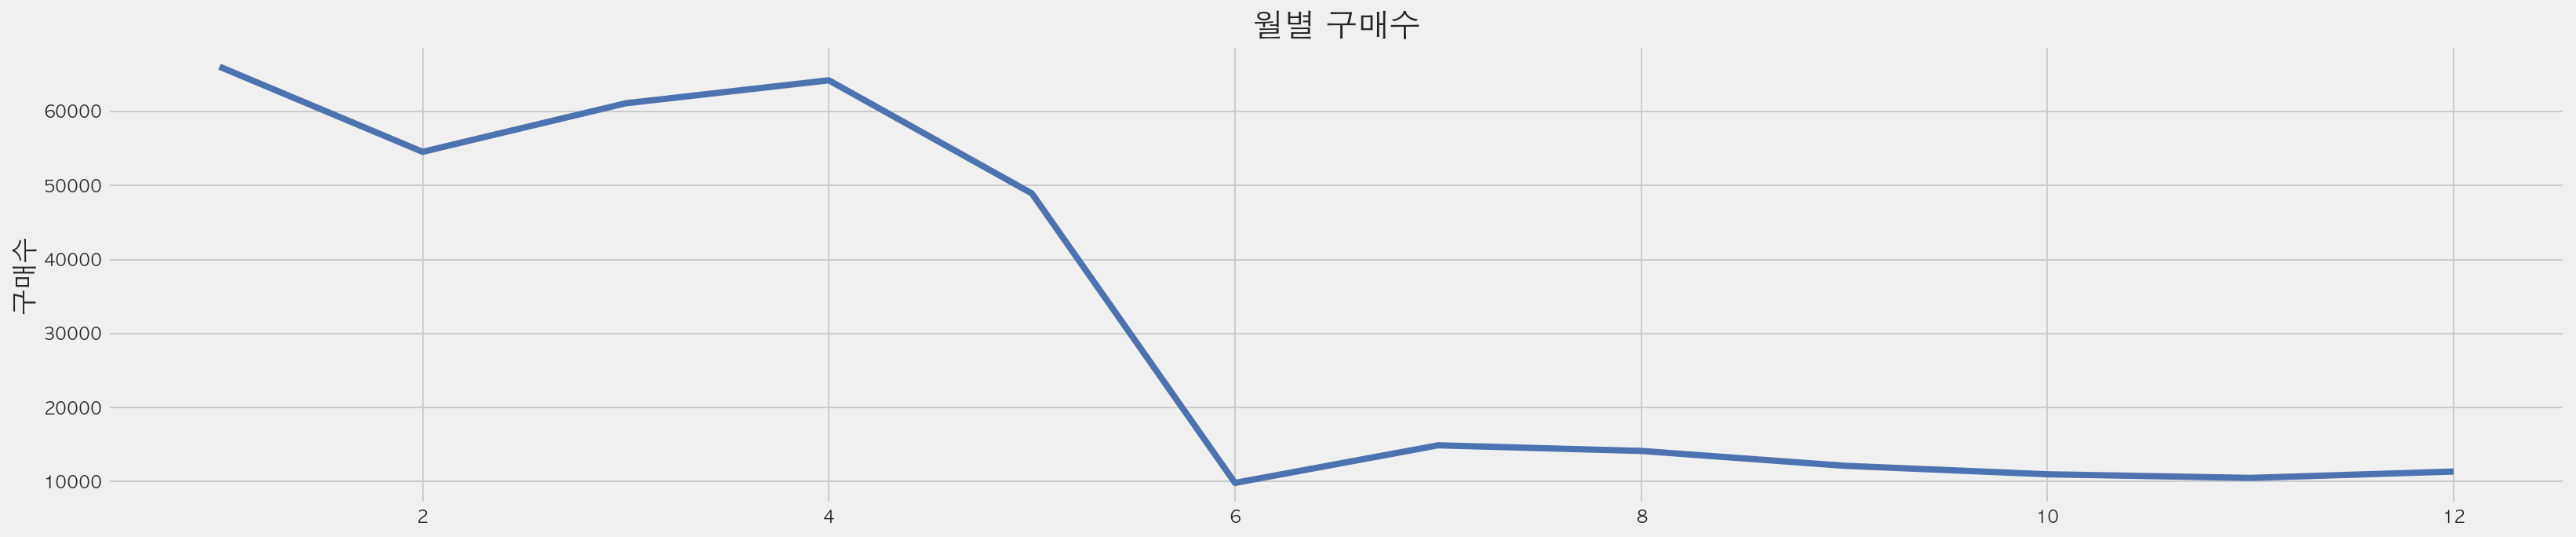

In [ ]:
# 월별 구매수
X = lpay_df["월"].value_counts()
fig ,ax = plt.subplots(figsize = (25,5))
sns.lineplot( X.index, X.values , ax = ax,color = "b")
ax.set_title(" 월별 구매수 ")
ax.set_ylabel("구매수")
plt.show()

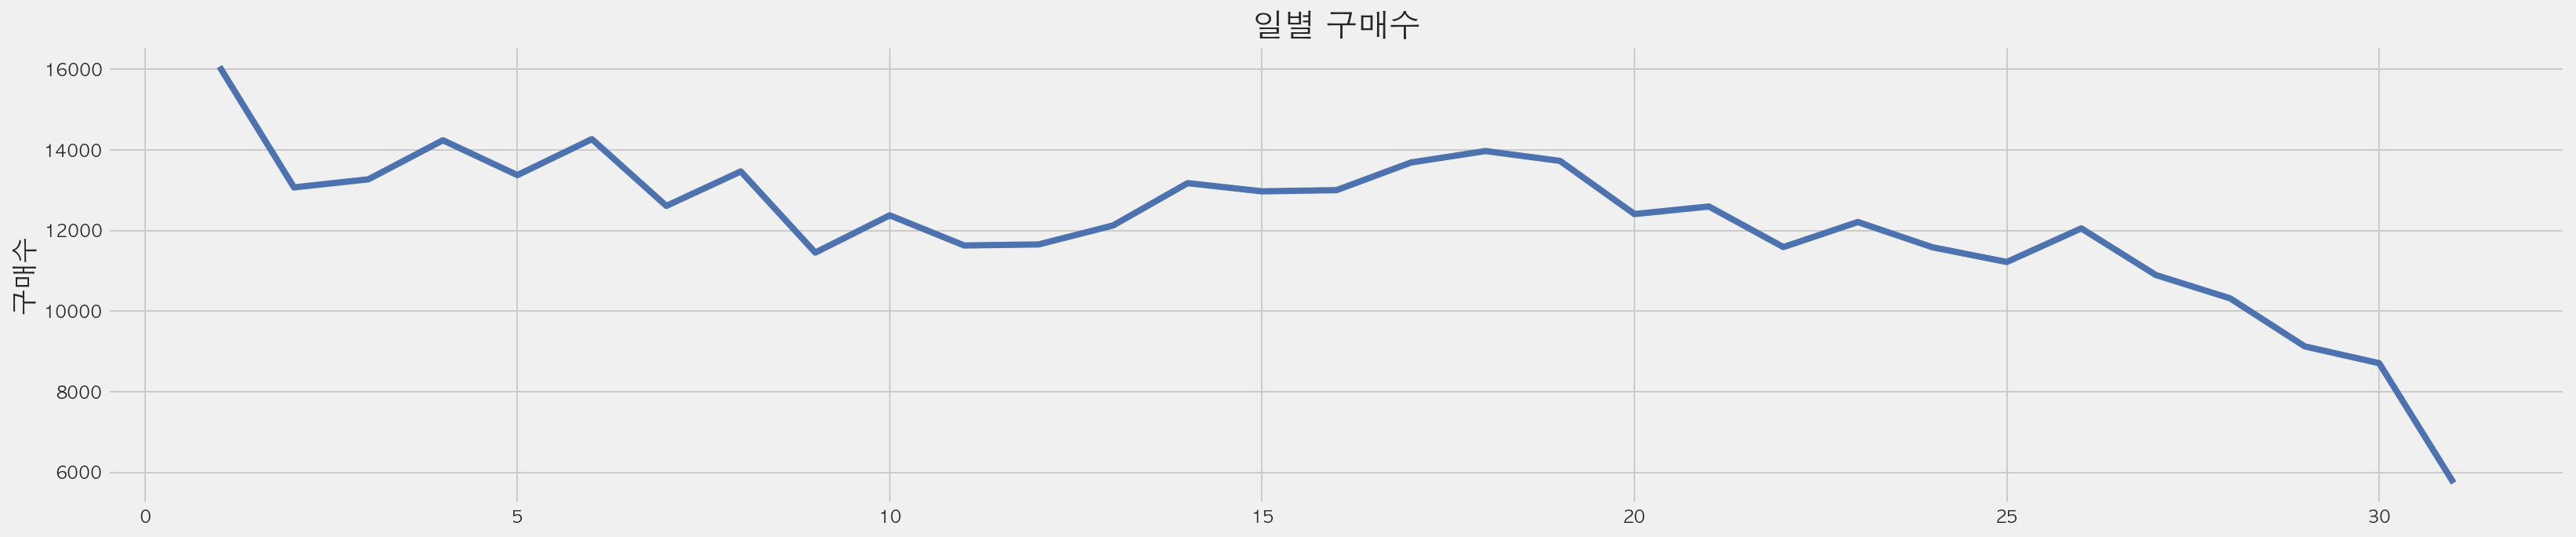

In [ ]:
# 일별 구매수 

y = lpay_df["일"].value_counts()
fig ,ax = plt.subplots(figsize = (25,5))
sns.lineplot( y.index, y.values , ax = ax,color = "b")
ax.set_title(" 일별 구매수 ")
ax.set_ylabel("구매수")
plt.show()

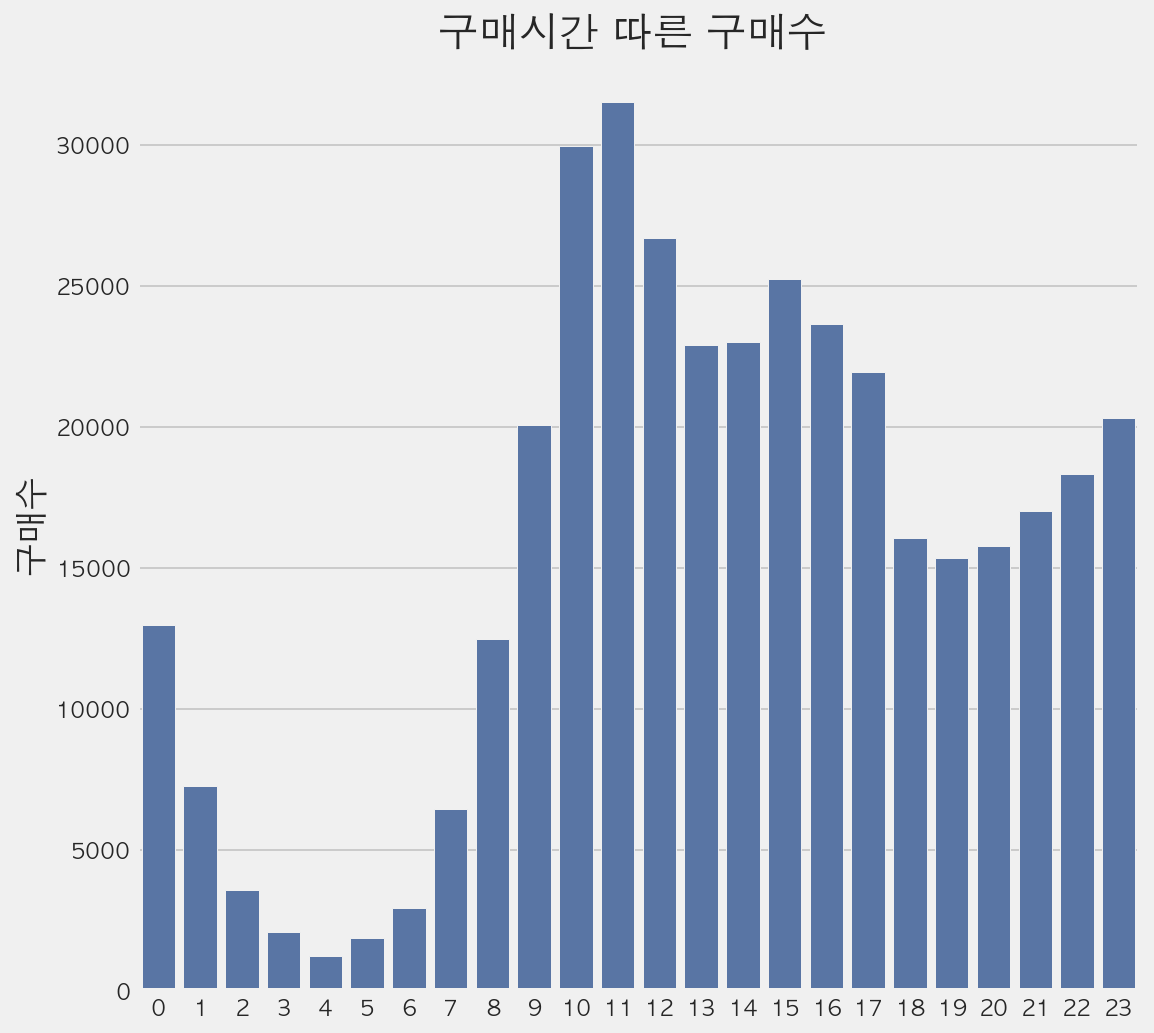

In [ ]:
# 구매시간에 따른 구매 수 

X = lpay_df['구매시간'].value_counts()
fig ,ax = plt.subplots(figsize = (8,8))
sns.barplot( X.index, X.values , ax = ax,color = "b")
ax.set_title(" 구매시간 따른 구매수  ")
ax.set_ylabel("구매수")
plt.show()

## 코호트 분석 

In [ ]:
# 코호트 분석 
cohort = lpay_df[['고객번호','구매일자']]
cohort['월_주문'] = cohort['구매일자'].dt.strftime('%Y-%m')
cohort.set_index('고객번호', inplace = True)

In [ ]:
# 고객 각각의 첫 구매기간 추출 

cohort['첫구매월'] = cohort.groupby(level = 0)['구매일자'].min().apply(lambda x :x.strftime('%y-%m'))
cohort.reset_index(inplace= True)
cohort.head()

,고객번호,구매일자,월_주문,첫구매월
0,M536644170,2021-04-27,2021-04,21-01
1,M536644170,2021-05-03,2021-05,21-01
2,M536644170,2021-05-12,2021-05,21-01
3,M536644170,2021-04-27,2021-04,21-01
4,M536644170,2021-03-18,2021-03,21-01


In [ ]:
# 첫 구매일과 구매날짜를 기준으로 고객 수, 주문 수, 총매출 합계 계산 

g = cohort.groupby(['첫구매월','월_주문'])

c = g.agg({'고객번호': pd.Series.nunique})

c.rename(columns ={ '고객번호': '고객수'}, inplace = True)
c.head()

고객수
첫구매월  월_주문        
20-12 2020-12   36
      2021-01   19
      2021-02   25
      2021-03   26
      2021-04   26

In [ ]:
# 년월 - 년월의 패턴을 년원 - 소요기간(월) 로 변환 

def cohort_period(cohort) :
    cohort['코호트_기간'] = np.arange(len(cohort)) +1 
    return cohort

In [ ]:
c = c.groupby(level = 0).apply(cohort_period)
c.head()

고객수  코호트_기간
첫구매월  월_주문                
20-12 2020-12   36       1
      2021-01   19       2
      2021-02   25       3
      2021-03   26       4
      2021-04   26       5

In [ ]:
# 리텐션 결과를 비율로 나타내기 위해 각각 첫 구매일에 따른 고객수 도출 

c.reset_index(inplace = True)
c.set_index(['첫구매월','코호트_기간'], inplace = True)

c_group_size = c['고객수'].groupby(level = 0).first()
c_group_size.head()

첫구매월
20-12      36
21-01    3398
21-02    1148
21-03     771
21-04     491
Name: 고객수, dtype: int64

In [ ]:
user_retention = c['고객수'].unstack(0).divide(c_group_size, axis = 1)
user_retention.head(10)

첫구매월,20-12,21-01,21-02,21-03,21-04,21-05,21-06,21-07,21-08,21-09,21-10,21-11,21-12
코호트_기간,,,,,,,,,,,,,
1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0
2,0.527778,0.726310,0.525261,0.442283,0.384929,0.234536,0.366013,0.311475,0.215116,0.252747,0.253333,0.181818,NaN
3,0.694444,0.753090,0.488676,0.424125,0.183299,0.288660,0.366013,0.202186,0.186047,0.318681,0.240000,NaN,NaN
4,0.722222,0.745438,0.480836,0.204929,0.262729,0.283505,0.228758,0.202186,0.180233,0.274725,NaN,NaN,NaN
5,0.722222,0.695115,0.295296,0.269780,0.264766,0.231959,0.235294,0.278689,0.232558,NaN,NaN,NaN,NaN
6,0.722222,0.301648,0.342334,0.272374,0.224033,0.231959,0.248366,0.289617,NaN,NaN,NaN,NaN,NaN
7,0.527778,0.374338,0.319686,0.215305,0.215886,0.260309,0.241830,NaN,NaN,NaN,NaN,NaN,NaN
8,0.694444,0.370806,0.270906,0.220493,0.230143,0.247423,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,0.694444,0.324603,0.277875,0.238651,0.230143,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


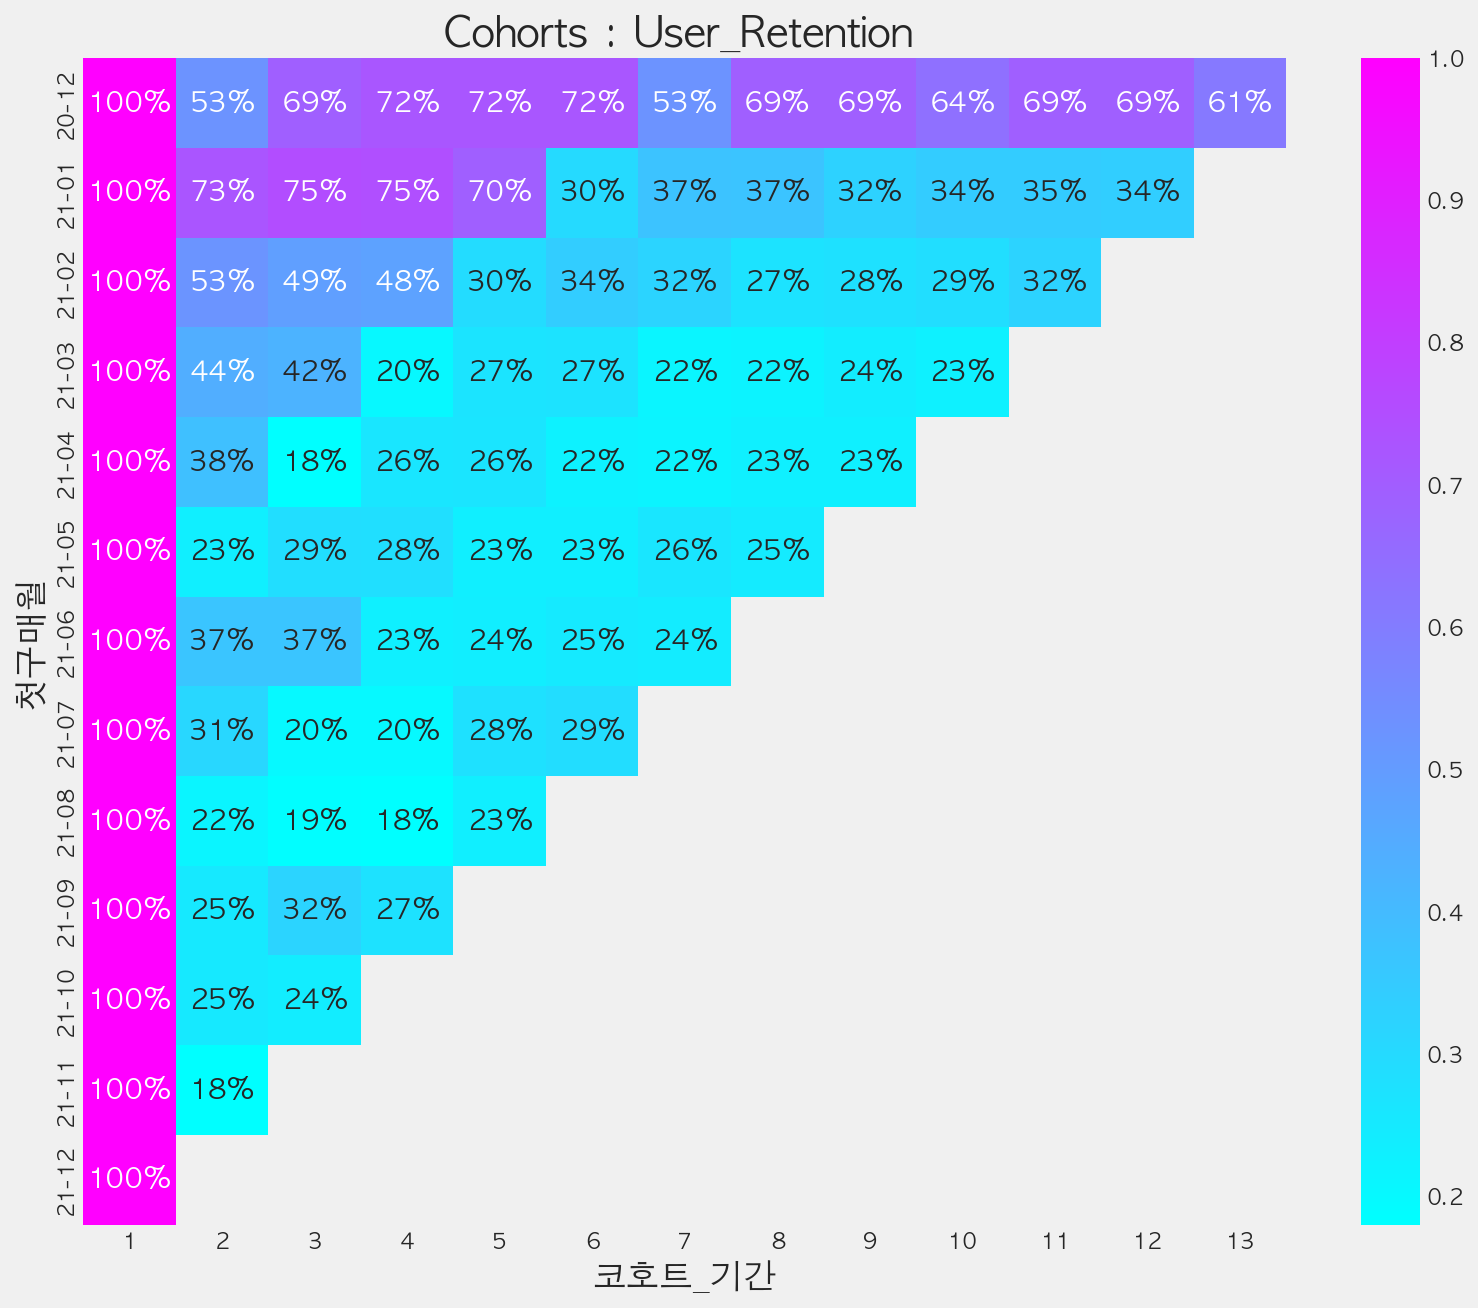

In [ ]:
fig ,ax = plt.subplots(figsize = (12,10))

sns.heatmap(user_retention.T, mask = user_retention.T.isnull(), annot = True, fmt = '.0%',cmap= 'cool')
ax.set_title(" Cohorts : User_Retention  ")
plt.show()

In [ ]:
Day_df = lpay_df[['일','고객번호']]

In [ ]:
R = Day_df.drop_duplicates()
G = R.groupby(['일']).size()

In [ ]:
G.sort_values(ascending =False).head(5)

일
1     2183
26    2161
4     2159
19    2140
18    2127
dtype: int64

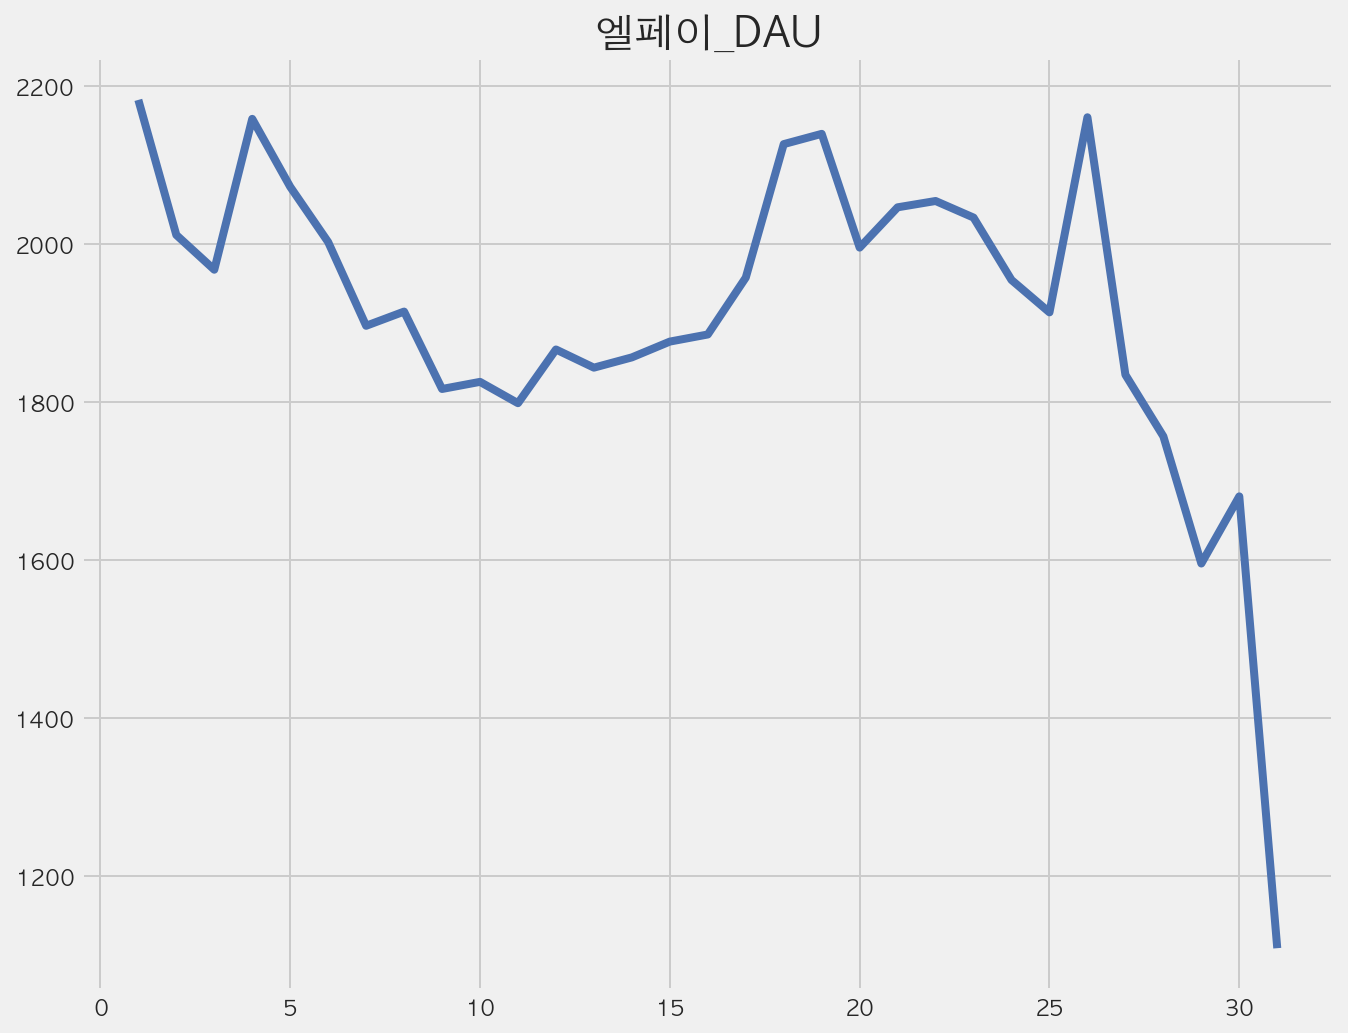

In [ ]:
fig , ax = plt.subplots( figsize = (10, 8))

ax.plot(G, color = 'b')
ax.set_title('엘페이_DAU')
plt.show()

In [ ]:
Day_df = lpay_df[['월','고객번호']]

In [ ]:
R = Day_df.drop_duplicates()
G = R.groupby(['월']).size()

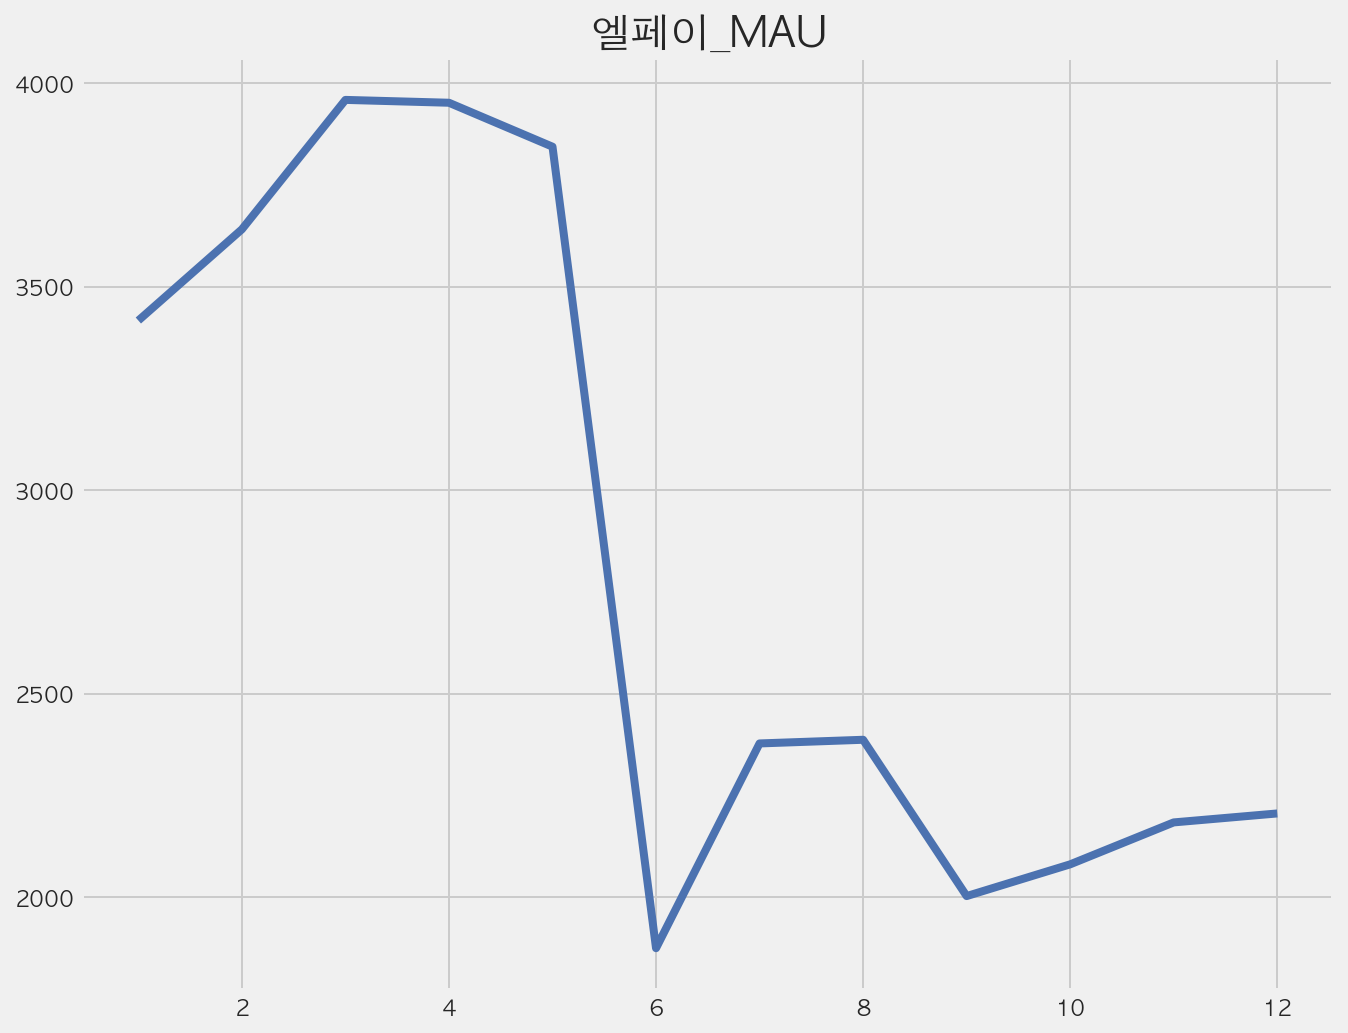

In [ ]:
fig , ax = plt.subplots( figsize = (10, 8))

ax.plot(G,color= 'b' )
ax.set_title('엘페이_MAU')
plt.show()

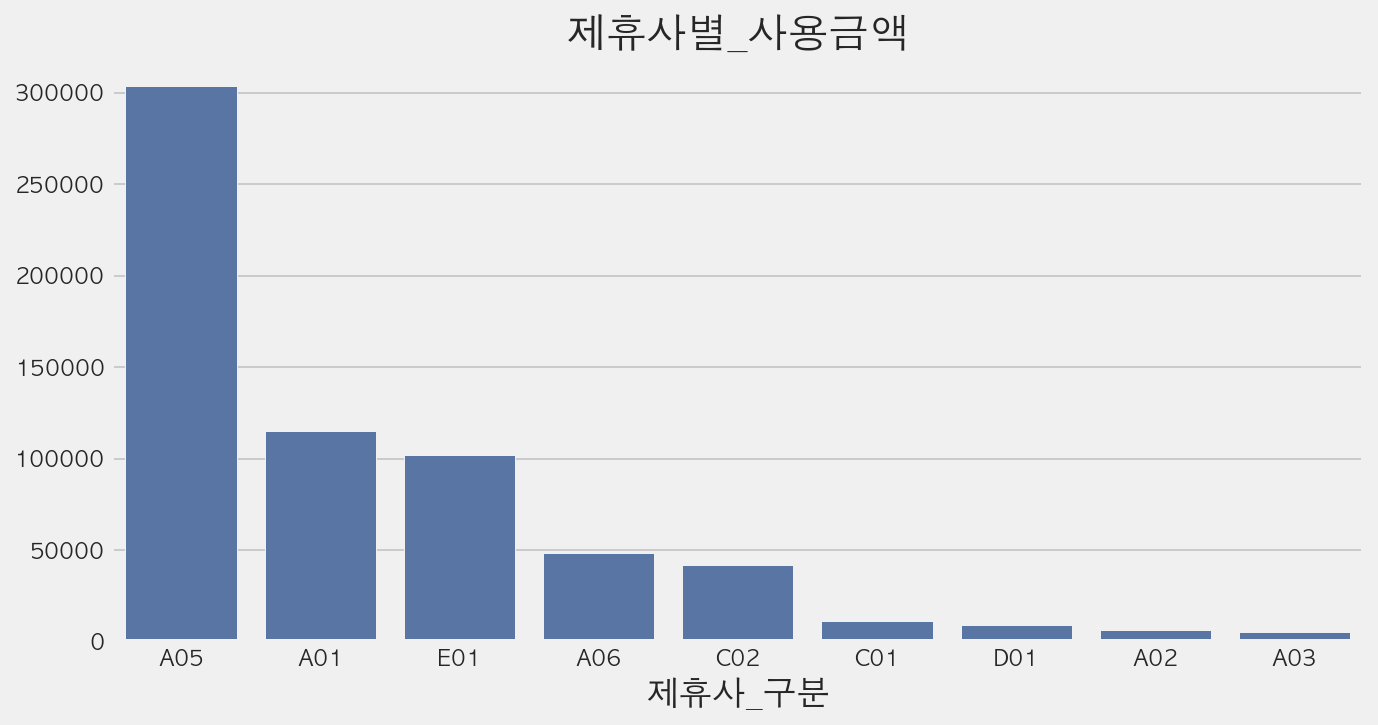

In [ ]:
# 제휴사별_사용금액 

x = lpay_df.groupby('제휴사_구분')['구매금액_X'].mean().round().sort_values(ascending = False)

fig ,ax = plt.subplots(figsize = (10,5))
sns.barplot( x.index, x.values , ax = ax, color = 'b')
ax.set_title(" 제휴사별_사용금액 ")
plt.show()

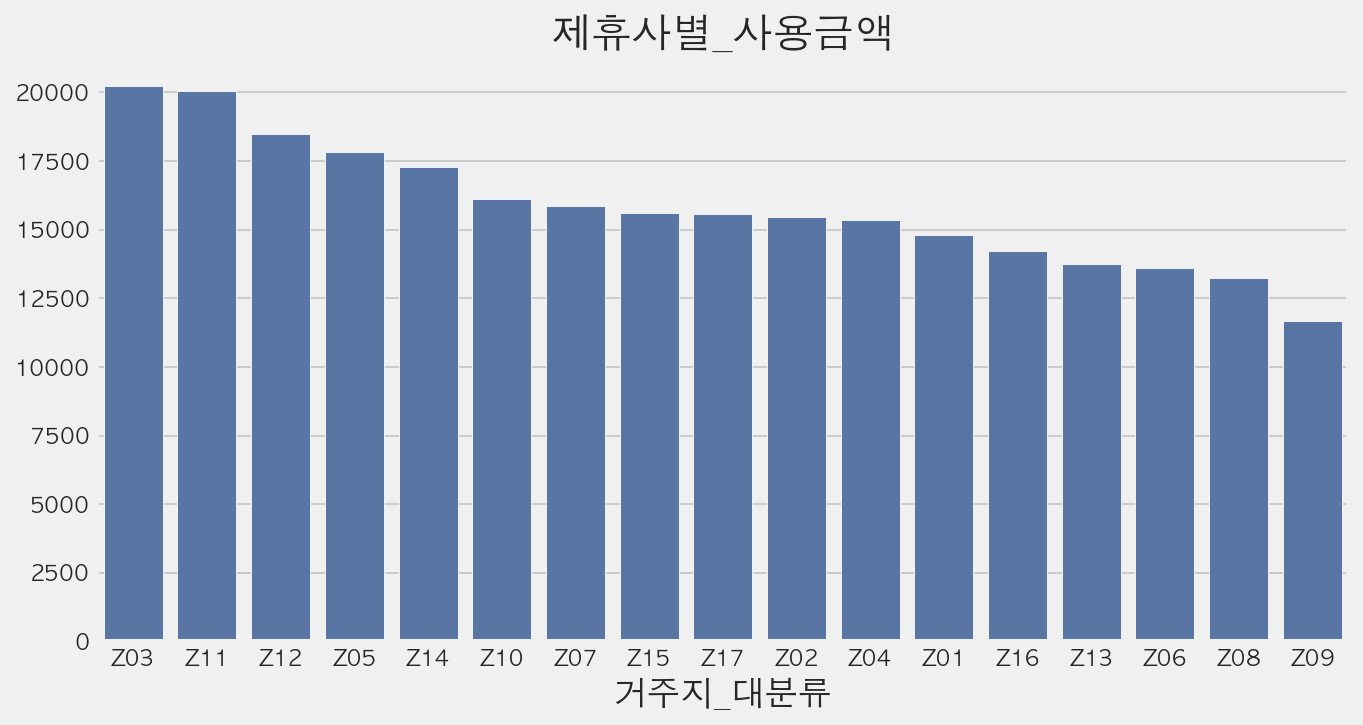

In [ ]:
# 거주지별_사용금액

x = lpay_df.groupby('거주지_대분류')['구매금액_X'].mean().round().sort_values(ascending = False)

fig ,ax = plt.subplots(figsize = (10,5))
sns.barplot( x.index, x.values , ax = ax, color = 'b')
ax.set_title(" 제휴사별_사용금액 ")
plt.show()

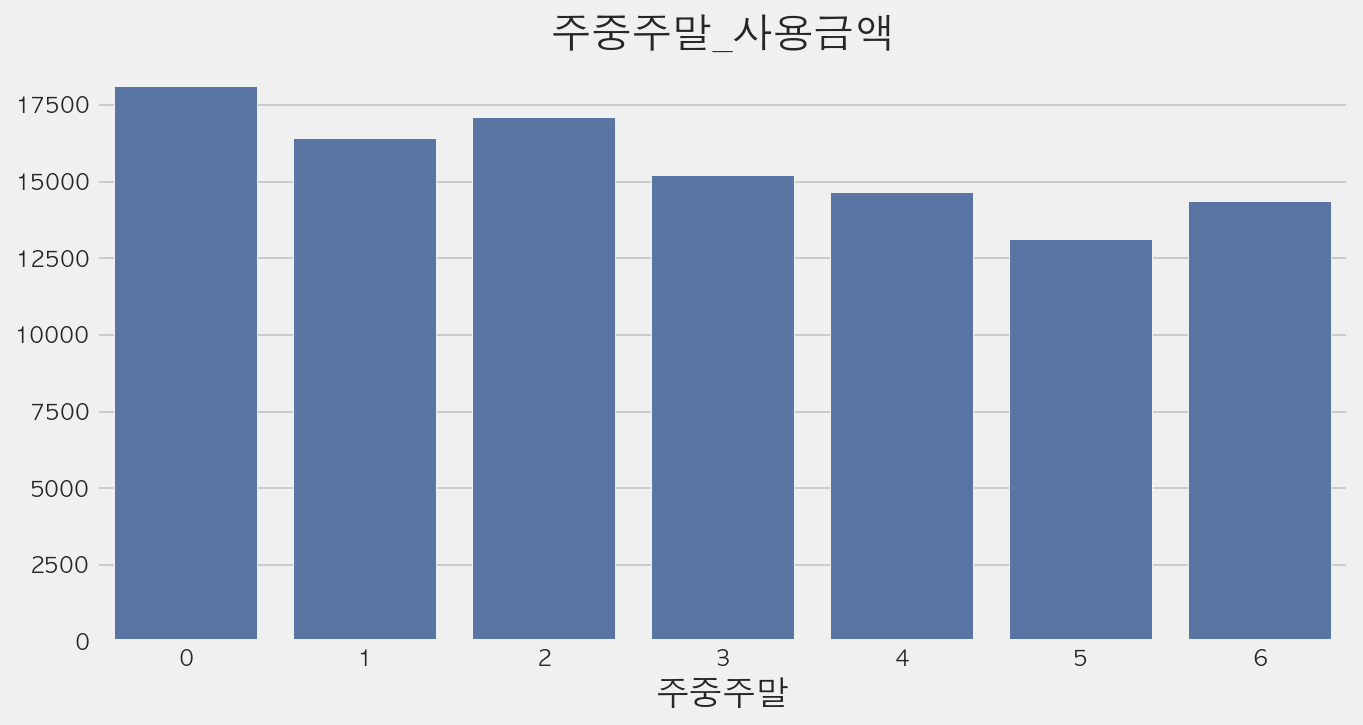

In [ ]:
# 주중주말
x = lpay_df.groupby('주중주말')['구매금액_X'].mean().round().sort_values(ascending = False)

fig ,ax = plt.subplots(figsize = (10,5))
sns.barplot( x.index, x.values , ax = ax, color = 'b')
ax.set_title(" 주중주말_사용금액 ")
plt.show()

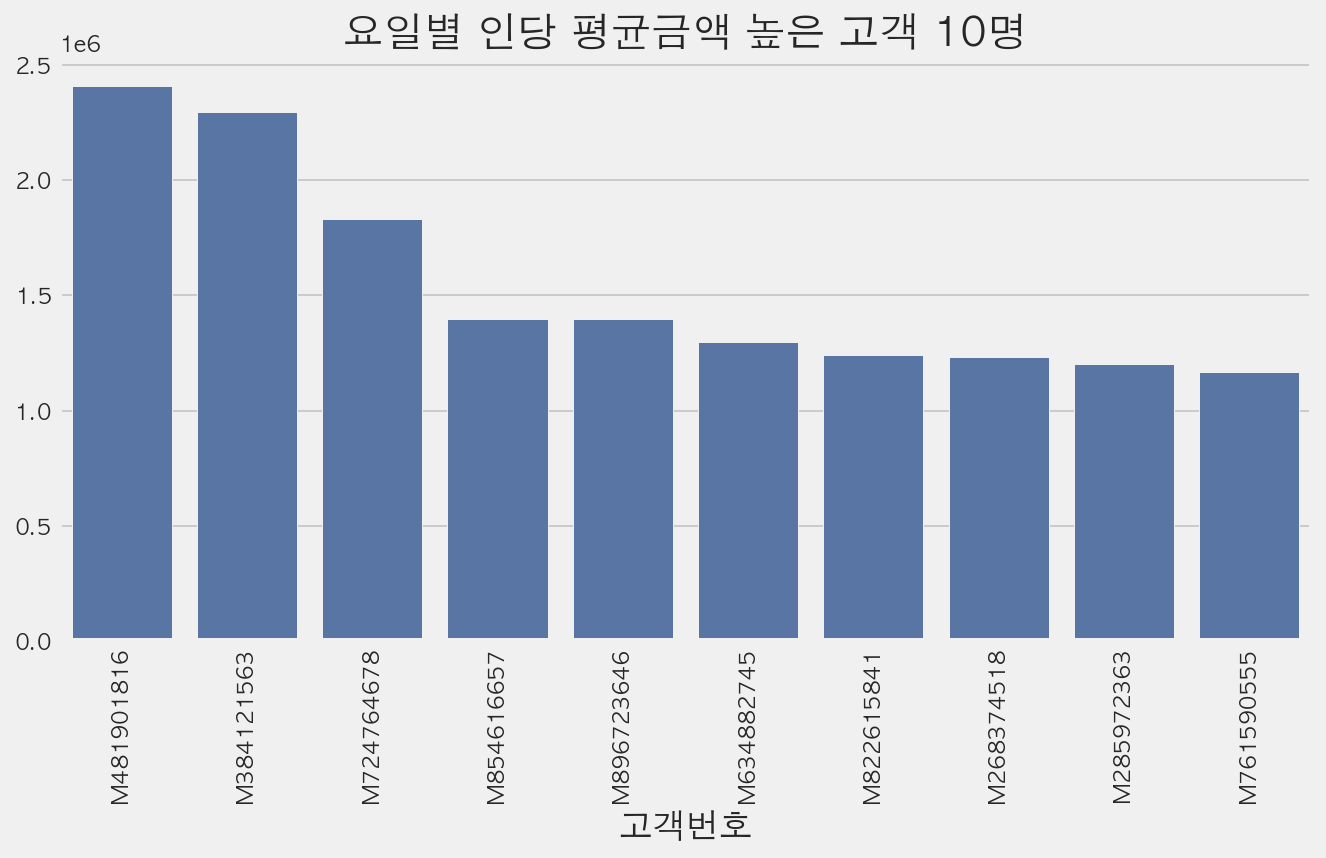

In [ ]:
# 요일별 인당 평균금액 높은 고객 10명 

x = lpay_df.groupby('고객번호')['요일별_인당_평균결제금액'].mean().round().sort_values(ascending = False).head(10)

fig ,ax = plt.subplots(figsize = (10,5))
sns.barplot( x.index, x.values , ax = ax, color = 'b')
ax.set_title(" 요일별 인당 평균금액 높은 고객 10명 ")
plt.xticks(rotation =90)
plt.show()